In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()

In [225]:
X = np.array(iris.data)
yy = np.array(iris.target)

## Scaling the data to make gradient descent work smoothly
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

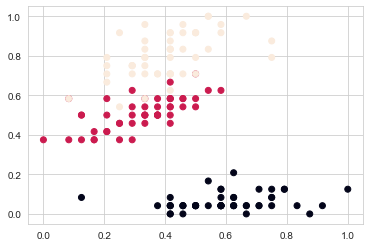

In [226]:
plt.scatter(X[:,1],X[:,3], c=yy)

In [227]:
## Data is already cleaned so no need of preprocessing
X_train = X[:100,:]
X_val = X[100:130,:]
X_test = X[130:150,:]

yy_train = yy[:100]
yy_val = yy[100:130]
yy_test = yy[130:150]


In [228]:
## Linear regression Using the least square method 

def lin_reg(X, yy, alpha):
    k = len(X[1])
    yy = np.concatenate((yy, np.zeros(k))) 
    z_k = np.sqrt(alpha) * np.eye(k)
    X = np.vstack((X,z_k))  
    
    b = np.concatenate((np.ones(len(X)-k), np.zeros(k)))[:,None]

    X = np.insert(X,[0],b,axis=1)

    w_fit=np.linalg.lstsq(X, yy, rcond=None)[0]
    
    
    return w_fit[1:], w_fit[0] 
    

In [229]:
alpha = 0.1

ww0, bb0 = lin_reg(X_train, yy_train, alpha)

print("Bias is:",bb0)
print("Weights are:","\n",ww0)

Bias is: 0.1627669178626844
Weights are: 
 [-0.00222321 -0.448918    1.00758936  0.78964089]


In [230]:
def mse(pred,yy):
    return np.mean((pred-yy)**2)

In [231]:
## for least square method
pred1_train = np.dot(X_train,ww0)+bb0
pred2_val = np.dot(X_val,ww0)+bb0
print("Means square for training set(using least square method):",mse(pred1_train, yy_train))
print("Means square for validation set(using least square method):",mse(pred2_val, yy_val))

Means square for training set(using least square method): 0.009239981546788631
Means square for validation set(using least square method): 0.3770600470257607


In [232]:
## Defining the gradient descent method

def grad_des(learning_rate, ww, bb, epochs):
    n=len(X_train)
    for i in range(epochs):
        yy_pred = np.dot(X_train,ww)+bb
        if i%100==0:
            print("MSE(train) for {0}th epoch is {1}".format(i,mse(yy_pred, yy_train)))
        D_ww = -2/n * np.sum(np.transpose(X_train) * (yy_train-yy_pred))
        D_bb = -2/n*np.sum((yy_train-yy_pred))
        ww-=learning_rate*D_ww
        bb-=learning_rate*D_bb
        
    

In [235]:
grad_ww = np.zeros(len(X[1]))
grad_bb = 0
epochs = 10000
grad_des(0.01, grad_ww , grad_bb, epochs)

MSE(train) for 0th epoch is 0.5
MSE(train) for 100th epoch is 0.129218167707151
MSE(train) for 200th epoch is 0.11396087809062956
MSE(train) for 300th epoch is 0.10367370536534856
MSE(train) for 400th epoch is 0.09673722534771322
MSE(train) for 500th epoch is 0.09206006512790516
MSE(train) for 600th epoch is 0.08890632898707615
MSE(train) for 700th epoch is 0.08677981392696571
MSE(train) for 800th epoch is 0.08534593800997552
MSE(train) for 900th epoch is 0.08437909785732792
MSE(train) for 1000th epoch is 0.08372717263165445
MSE(train) for 1100th epoch is 0.08328758962643318
MSE(train) for 1200th epoch is 0.08299118566648557
MSE(train) for 1300th epoch is 0.08279132510220283
MSE(train) for 1400th epoch is 0.08265656224288585
MSE(train) for 1500th epoch is 0.08256569375006206
MSE(train) for 1600th epoch is 0.0825044225435151
MSE(train) for 1700th epoch is 0.08246310832518644
MSE(train) for 1800th epoch is 0.0824352507925491
MSE(train) for 1900th epoch is 0.08241646689305802
MSE(train) f

In [234]:
pred_val_grad = np.dot(X_val,grad_ww)+grad_bb
pred_test_grad = np.dot(X_test,grad_ww)+grad_bb

print("MSE validation set(using gradient method):",mse(pred_val_grad, yy_val))
print("MSE test set(using gradient method):",mse(pred_test_grad, yy_test))

MSE validation set(using gradient method): 0.14460991025785574
MSE test set(using gradient method): 0.10828080849839088


In [ ]:
## Bayesian linear regression....